In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import tqdm # interactive progress bar

plt.style.use('ggplot')
%matplotlib inline

In [2]:
f_names={'MK':'MK', 'SEGMENT':'Сегмент', 'Service':'Услуга', 'Channeltype': 'Тип канала', 'Source': 'Источник ЕИ', 
'football':'Футбол', 'DECLARED_FAULT':'Заявл. неисправность', 'CREATE_DATE':'Дата создания', 'CLOSETIME':'Дата закрытия',
'all_num_of_repeat':'Всего повторок', 'num_of_repeat2':'Повторок за 2 дня', 'num_of_repeat5':'Повторок за 5 дней',
'num_of_repeat10':'Повторок за 10 дней', 'num_of_repeat30':'Повторок за 30 дней', 'num_of_repeat60':'Повторок за 60 дней',
'MITYPE':'Тип МИ', 'MIPRIORITY':'Приоритет МИ', 'MIIMPACT':'Влияние МИ', 'TECHNICAL_DISTRICT':'Техрайон(WFM)',
'NumWFMforEI':'Кол-во WFM', 'Last_WFM_days_waiting':'Кол-во дней ожидания выезда', 'EIDayOfWeek':'День недели заведения ЕИ',
'EIHourCreate':'Час создания ЕИ'}

In [3]:
# help(pd.read_csv)
url_to_data = 'data/data2508_fromAug2017.csv'
data = pd.read_csv(url_to_data, names=f_names.keys(), na_values='0', delimiter=';', skiprows=[0])

C:\Users\MRekunchak\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.shape

(37337, 23)

In [5]:
# data.columns=['A' + str(i) for i in range(len(data.columns))]
# data.head()

In [6]:
# data.describe()

In [7]:
# extract categorical and numerical features
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print('Categorical columns: ', categorical_columns)
print('Numerical columns: ', numerical_columns)

Categorical columns:  ['MK', 'SEGMENT', 'DECLARED_FAULT', 'CREATE_DATE']
Numerical columns:  ['Service', 'Channeltype', 'Source', 'football', 'CLOSETIME', 'all_num_of_repeat', 'num_of_repeat2', 'num_of_repeat5', 'num_of_repeat10', 'num_of_repeat30', 'num_of_repeat60', 'MITYPE', 'MIPRIORITY', 'MIIMPACT', 'TECHNICAL_DISTRICT', 'NumWFMforEI', 'Last_WFM_days_waiting', 'EIDayOfWeek', 'EIHourCreate']


In [8]:
data[numerical_columns].describe()

,Service,Channeltype,Source,football,CLOSETIME,all_num_of_repeat,num_of_repeat2,num_of_repeat5,num_of_repeat10,num_of_repeat30,num_of_repeat60,MITYPE,MIPRIORITY,MIIMPACT,TECHNICAL_DISTRICT,NumWFMforEI,Last_WFM_days_waiting,EIDayOfWeek,EIHourCreate
count,37336.000000,33451.000000,37337.000000,37318.000000,3.515800e+04,3.317600e+04,3676.000000,8846.000000,15020.000000,33175.000000,33175.000000,2384.000000,1734.000000,1717.000000,23261.000000,23261.000000,15669.000000,37336.000000,37021.000000
mean,8795.250857,9302.393710,8700.483836,3.778793,1.502689e+09,4.528192e+04,1.051959,1.093149,1.129494,1.263632,1.380678,1.130453,2.880623,2.852068,34.873608,1.064658,1.449869,4.007044,14.514114
std,315.629593,334.134662,389.433216,2.087373,6.114390e+05,8.247373e+06,0.237376,0.336786,0.413432,0.645679,0.854690,0.475338,0.843935,0.801523,9.251865,0.282383,1.229423,1.698999,4.158670
min,8676.000000,9203.000000,6026.000000,1.000000,1.501560e+09,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,-24.000000,1.000000,1.000000
25%,8678.000000,9204.000000,8750.000000,3.000000,1.502190e+09,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,29.000000,1.000000,1.000000,3.000000,11.000000
50%,8678.000000,9204.000000,8750.000000,3.000000,1.502719e+09,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,36.000000,1.000000,1.000000,4.000000,14.000000
75%,8680.000000,9205.000000,8750.000000,4.000000,1.503237e+09,2.000000e+00,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,3.000000,41.000000,1.000000,1.000000,5.000000,18.000000
max,9650.000000,10769.000000,10867.000000,35.000000,1.503672e+09,1.502200e+09,3.000000,5.000000,7.000000,9.000000,13.000000,6.000000,5.000000,4.000000,64.000000,7.000000,24.000000,7.000000,23.000000


In [9]:
data[categorical_columns].describe() # Stats for categorial features

,MK,SEGMENT,DECLARED_FAULT,CREATE_DATE
count,37073,37312,37337,37337
unique,27,7,225,36618
top,ФЛ,МР,"Телефония. Тишина в трубке, нет зуммера",1502269439
freq,28426,29327,4016,3


In [10]:
# data.describe(include=[object]) # Another way to do the same

In [11]:
## Legends
LEGEND={'Channeltype':{
'9207':'Медная линия',
'9205':'Канальная АТШ',
'9204': 'Канальная PON',
'9986':'Канальная Radio',
'9206':'Кодер видеонаблюдения',
'9636':'IP ОПС',
'9987':'Канальная Радио (юрики)',
'9203':'Канал ADSL',
'9633':'Канальная FTTB',
'9632':'ОПС',
'9202':'Камера видеонаблюдения',
'10769':'Канальная МЕДЬ',
'9197':'RFC PON',
'9198':'RFC АТШ',
'9199':'Интернет PON',
'9200':'Интернет АТШ',
'9201':'Интернет АТШ (юрики)',
'9208':'Телевидение PON',
'9209':'Телевидение АТШ',
'9210':'Телефон PON',
'9211':'Телефон АТШ',
'9212':'УПАТС PON',
'9630':'Телефон FTTB',
'9631':'Телевидение FTTB',
'9634':'Интернет FTTB',
'9635':'RFC FTTB'},
'Service':{
'9650':'Все сервисы',
'9697':'ОПС',
'8677':'Не сетевой инцидент',
'8679':'Телевидение',
'8681':'Технологические сервисы',
'8676':'Дополнительные сервисы',
'8678':'Передача данных',
'8680':'Телефония',
'8682':'Энергетическое и климатическое обеспечение технологических площадок'}}

In [12]:
stats=dict()
stat=dict()
for i in ['MK', 'SEGMENT', 'DECLARED_FAULT', 'Service', 'Channeltype', 'football', 'TECHNICAL_DISTRICT',
          'EIDayOfWeek', 'EIHourCreate']:
    stats[i]=data[i].value_counts()
    stat[i]=pd.Series(stats[i])
# print(stats.keys())
# print(stats['Service'])
stats['Service']

8678.0    19202
8680.0     9642
9650.0     4480
8679.0     3848
8677.0       92
8681.0       42
8676.0       28
8682.0        2
Name: Service, dtype: int64

In [13]:
stats['MK'].values

array([28426,  2865,   842,   801,   732,   672,   584,   416,   350,
         213,   209,   182,   146,   137,   111,    91,    87,    69,
          32,    31,    31,    25,     8,     5,     3,     3,     2], dtype=int64)

In [14]:
LEGEND['Channeltype'].keys()

dict_keys(['9207', '9205', '9204', '9986', '9206', '9636', '9987', '9203', '9633', '9632', '9202', '10769', '9197', '9198', '9199', '9200', '9201', '9208', '9209', '9210', '9211', '9212', '9630', '9631', '9634', '9635'])

In [15]:
cat_features=set()
for feature in sorted(stats.keys()):
    d_first=20
#     print(len(stats[feature]))
    if len(stats[feature])< 20:
        d_first = len(stats[feature])
    print("\n"+feature+"\n")
    for i in stats[feature].keys()[:d_first]:
        if type(i) == str:
            print(stats[feature][i], "\t", i)
        else:
            cat_features.add(feature)
# print(cat_features)
if cat_features:
    for feature in cat_features:
        try:
            if LEGEND[feature]:
            
                print("\n", feature, "\n")
                for i in stats[feature].keys():
                    print(stats[feature][i], "\t", LEGEND[feature][str(int(i))])
        except:
                pass
#     print(stats[feature].keys()[:d_first], stats[feature].values[:d_first])
    


Channeltype


DECLARED_FAULT

4016 	 Телефония. Тишина в трубке, нет зуммера
2809 	 ONT не на линии. Проблема с оптическим кабелем
2556 	 Телефония. Тишина в трубке
2381 	 Интернет. Не работает интернет
1642 	 Не работает ONT. Нет индикации питания.
1505 	 Интернет. Не открываются все страницы
1463 	 ТВ. Не получен IP-адрес
1195 	 ТВ. Черный или синий экран
890 	 ТВ. Проблемы с пультом
779 	 Swap ONT Huawei
779 	 Интернет. Другое
722 	 Перенос/замена модели ONT
721 	 Телефония. Зуммер занято
697 	 SLX_Не работает INTERNET
695 	 ONT на линии. Высокое затухание
672 	 Интернет. Не открываются страницы
661 	 ТВ. Рассыпание/замирание
653 	 ТВ. Другое
536 	 Нет трансляции на портале
533 	 Интернет. Нет линка

EIDayOfWeek


EIHourCreate


MK

28426 	 ФЛ
2865 	 SOHO
842 	 NKA
801 	 Выделенное обслуживание (пилот)
732 	 GS-SLA4
672 	 SME
584 	 Оператор
416 	 SME GS
350 	 Corporate
213 	 KA
209 	 SOHO_GS
182 	 GS-SLA1
146 	 Corporate GS
137 	 GS-Имидж абоненты
111 	 Имидж-абоненты (физические л

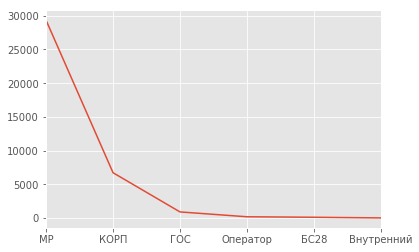

In [16]:
stats['SEGMENT'][:6].plot()

In [17]:
# data.head()

In [18]:
for i in data:
    print(data[i].describe())

count     37073
unique       27
top          ФЛ
freq      28426
Name: MK, dtype: object
count     37312
unique        7
top          МР
freq      29327
Name: SEGMENT, dtype: object
count    37336.000000
mean      8795.250857
std        315.629593
min       8676.000000
25%       8678.000000
50%       8678.000000
75%       8680.000000
max       9650.000000
Name: Service, dtype: float64
count    33451.000000
mean      9302.393710
std        334.134662
min       9203.000000
25%       9204.000000
50%       9204.000000
75%       9205.000000
max      10769.000000
Name: Channeltype, dtype: float64
count    37337.000000
mean      8700.483836
std        389.433216
min       6026.000000
25%       8750.000000
50%       8750.000000
75%       8750.000000
max      10867.000000
Name: Source, dtype: float64
count    37318.000000
mean         3.778793
std          2.087373
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         35.000000
Name: football, dtype:

In [19]:
# Cleaning the data
# dropped_data_without_empty_cols = data.dropna(axis=1)
# dropped_data_without_empty_rows = data.dropna(axis=0)
# data.count(axis=0)



for item in ['all_num_of_repeat', 'num_of_repeat2', 'num_of_repeat5', 'num_of_repeat10', 'num_of_repeat30', 'num_of_repeat60']:
    data[item]=data[item][data[item].isin([i for i in range(1000)] + [str(i) for i in range(1000)])]
    data[item]=data[item].replace(to_replace=[np.nan], value=[0])

    

# for col_name in ['SERVICE', 'channeltype', 'source']:
#     data[col_name]=data[col_name].replace(to_replace=[np.nan], value=[0])
#     data[col_name]=data[col_name].replace(to_replace=data[col_name].unique(), value=[i for i in range(len(data[col_name].unique()))])



# data['DECLARED_FAULT']=data['DECLARED_FAULT'].replace(to_replace=data['DECLARED_FAULT'].unique(), value=[i for i in range(1,len(data['DECLARED_FAULT'].unique())+1)]) 

# data['CLIENT_CATEGORY']=data['CLIENT_CATEGORY'][data['CLIENT_CATEGORY'].isin(['ФЛ', 'SOHO', 'NKA', 
# 'Выделенное обслуживание (пилот)', 'GS-SLA4', 'SME', 'Оператор', 'SME GS', 'Corporate', 'KA', 'SOHO_GS', 'GS-SLA1', 
# 'Corporate GS', 'GS-Имидж абоненты', 'Имидж-абоненты (физические лица)', 'GS-SLA3', 'INDIVIDUAL', 'KA GS', 'ФЛ_ИЗ_МРМ',
# 'Развитие', 'СПЕЦ', 'Внутренний', 'Посольства', 'Имидж-абоненты (юридические лица)', 'NKA GS'])]
# data['CLIENT_CATEGORY']=data['CLIENT_CATEGORY'].replace(to_replace=data['CLIENT_CATEGORY'].unique(), value=[i for i in range(1,len(data['CLIENT_CATEGORY'].unique())+1)]) 

# data['SEGMENT']=data['SEGMENT'][data['SEGMENT'].isin(['МР','КОРП','ГОС','Оператор','БС28','Внутренний','БС22'])]
# data['SEGMENT']=data['SEGMENT'].replace(to_replace=data['SEGMENT'].unique(), value=[i for i in range(1,len(data['SEGMENT'].unique())+1)]) 


data['DECLARED_FAULT']=data['DECLARED_FAULT'].map(data.groupby('DECLARED_FAULT').size())

data['MK']=data['MK'].map(data.groupby('MK').size())

data['SEGMENT']=data['SEGMENT'].map(data.groupby('SEGMENT').size())



for i in ['CREATE_DATE', 'CLOSETIME']:
    data[i] = pd.to_numeric(data[i],errors='coerce')

In [20]:
data['MK']

0        28426.0
1          842.0
2        28426.0
3        28426.0
4        28426.0
5        28426.0
6        28426.0
7          672.0
8        28426.0
9          842.0
10       28426.0
11       28426.0
12         842.0
13       28426.0
14           NaN
15       28426.0
16         842.0
17         842.0
18       28426.0
19       28426.0
20       28426.0
21       28426.0
22       28426.0
23       28426.0
24         842.0
25       28426.0
26        2865.0
27       28426.0
28        2865.0
29        2865.0
          ...   
37307    28426.0
37308    28426.0
37309    28426.0
37310    28426.0
37311    28426.0
37312    28426.0
37313      584.0
37314    28426.0
37315     2865.0
37316    28426.0
37317    28426.0
37318    28426.0
37319    28426.0
37320    28426.0
37321      801.0
37322    28426.0
37323    28426.0
37324     2865.0
37325    28426.0
37326    28426.0
37327     2865.0
37328    28426.0
37329      416.0
37330    28426.0
37331    28426.0
37332    28426.0
37333    28426.0
37334    28426

In [21]:
data['CREATE_DATE'].unique()

array([  1.50154741e+09,   1.50154986e+09,   1.50155811e+09, ...,
         1.50367247e+09,   1.50367254e+09,   1.50367252e+09])

In [22]:
type(data['CREATE_DATE'].head()[1])

numpy.float64

In [23]:
# Generation of data
data['decision_time'] = data['CLOSETIME']-data['CREATE_DATE']

In [24]:
data['SEGMENT'].head()

0    29327.0
1     6723.0
2    29327.0
3    29327.0
4    29327.0
Name: SEGMENT, dtype: float64

In [25]:
# # Selecting data
# sel_data = pd.concat((data['CLIENT_CATEGORY'],
# data['SEGMENT'],
# data['SERVICE'],
# data['channeltype'],
# data['source'],
# # data['CHANNELREQUESTID'],
# data['football'],
# data['DECLARED_FAULT'],
# data['all_num_of_repeat'],
# data['num_of_repeat2'],
# data['num_of_repeat5'],
# data['num_of_repeat10'],
# data['num_of_repeat30'],
# data['num_of_repeat60'],
# data['CREATE_DATE'],
# data['CLOSETIME'],
# data['decision_time'],
# # data['TIMELEFTSLA']
#                      ), axis=1)
# sel_data.describe()

In [26]:
print(data['football'].unique()[2])
# for i in sel_data['SERVICE']:
#     if i.startswith('2'):
#         pass
#     else:
#         print(i)

5.0


In [27]:
# # full list of categorical columns, where 'nan' is missing values
# for c in sel_data:
#     print(c, sel_data[c].unique(), len(sel_data[c].unique()))

In [28]:
# # for each numerical/quantitative feature built histogram,
# # for each pair of nemerical built dispersion (scattering) diagram
# from pandas.plotting import scatter_matrix
# scatter_matrix(data, alpha=0.05, figsize=(15, 15));

In [29]:
data[numerical_columns].corr() # matrix of correlations

,Service,Channeltype,Source,football,CLOSETIME,all_num_of_repeat,num_of_repeat2,num_of_repeat5,num_of_repeat10,num_of_repeat30,num_of_repeat60,MITYPE,MIPRIORITY,MIIMPACT,TECHNICAL_DISTRICT,NumWFMforEI,Last_WFM_days_waiting,EIDayOfWeek,EIHourCreate
Service,1.000000,-0.001649,-0.320615,0.158478,0.001644,-0.127057,-0.057593,-0.086844,-0.135407,-0.289981,-0.246988,0.010666,0.413058,0.430359,0.013381,0.001564,-0.020100,0.006618,-0.072598
Channeltype,-0.001649,1.000000,0.003117,0.110054,0.001747,0.008927,-0.015653,-0.005914,0.000827,0.040759,0.052948,-0.133574,0.009010,-0.007064,-0.041777,0.033879,0.030537,-0.006233,0.039981
Source,-0.320615,0.003117,1.000000,-0.120717,-0.000968,0.090647,0.040768,0.066743,0.094205,0.196093,0.170141,0.073514,-0.029790,-0.045783,0.019958,-0.001393,-0.003403,0.008604,0.041906
football,0.158478,0.110054,-0.120717,1.000000,0.056037,-0.000546,-0.084411,-0.046484,-0.049922,-0.034847,-0.018318,-0.143646,0.066456,0.084860,0.022309,0.121462,-0.024851,-0.030946,-0.050662
CLOSETIME,0.001644,0.001747,-0.000968,0.056037,1.000000,-0.021627,0.330153,0.546532,0.628572,-0.026239,-0.031709,0.013624,0.192071,0.213794,0.020815,0.030236,0.051954,-0.034867,0.016384
all_num_of_repeat,-0.127057,0.008927,0.090647,-0.000546,-0.021627,1.000000,0.091303,0.146011,0.183604,0.511363,0.610767,-0.043807,-0.127603,-0.182161,0.001642,0.005689,-0.009391,-0.007441,-0.009936
num_of_repeat2,-0.057593,-0.015653,0.040768,-0.084411,0.330153,0.091303,1.000000,0.614464,0.428870,0.155899,0.130895,0.167638,-0.050302,-0.048986,-0.003935,-0.019430,-0.002655,0.180910,0.033612
num_of_repeat5,-0.086844,-0.005914,0.066743,-0.046484,0.546532,0.146011,0.614464,1.000000,0.714422,0.280355,0.244069,0.081774,-0.011611,-0.017652,0.009250,-0.019382,-0.023281,-0.066086,0.011793
num_of_repeat10,-0.135407,0.000827,0.094205,-0.049922,0.628572,0.183604,0.428870,0.714422,1.000000,0.395518,0.345598,0.070400,-0.035070,-0.047693,0.011554,-0.010121,-0.005187,0.063787,0.036667
num_of_repeat30,-0.289981,0.040759,0.196093,-0.034847,-0.026239,0.511363,0.155899,0.280355,0.395518,1.000000,0.896223,0.046948,-0.316969,-0.355420,-0.000881,0.020670,-0.012892,-0.004994,0.038124


In [30]:
# Find the number of completed (not skipped) items
# axis = 0 means that we move counter from top to bottom, and axis = 1 than we move counter from left to right
data.count(axis=0)

MK                       37073
SEGMENT                  37312
Service                  37336
Channeltype              33451
Source                   37337
football                 37318
DECLARED_FAULT           37337
CREATE_DATE              37336
CLOSETIME                35158
all_num_of_repeat        37337
num_of_repeat2           37337
num_of_repeat5           37337
num_of_repeat10          37337
num_of_repeat30          37337
num_of_repeat60          37337
MITYPE                    2384
MIPRIORITY                1734
MIIMPACT                  1717
TECHNICAL_DISTRICT       23261
NumWFMforEI              23261
Last_WFM_days_waiting    15669
EIDayOfWeek              37336
EIHourCreate             37021
decision_time            35157
dtype: int64

In [31]:
# fill the missing values
# fill all numerical features (Instead of gaps (missing values), we substitute the median values (data.median(axis=0)))
data = data.fillna(0, axis=0)

In [32]:
# before
# data['A1'].describe()

In [33]:
# # fill the missing values in categorical feature with top value (Instead missing values) we substitute 
# # the top value in this column
# data['A1'] = data['A1'].fillna('b')

In [34]:
# result
data.describe()

,MK,SEGMENT,Service,Channeltype,Source,football,DECLARED_FAULT,CREATE_DATE,CLOSETIME,all_num_of_repeat,...,num_of_repeat60,MITYPE,MIPRIORITY,MIIMPACT,TECHNICAL_DISTRICT,NumWFMforEI,Last_WFM_days_waiting,EIDayOfWeek,EIHourCreate,decision_time
count,37337.000000,37337.000000,37337.000000,37337.000000,37337.000000,37337.000000,37337.000000,3.733700e+04,3.733700e+04,37337.000000,...,37337.000000,37337.000000,37337.000000,37337.000000,37337.000000,37337.000000,37337.000000,37337.000000,37337.000000,3.733700e+04
mean,21946.572006,24269.775933,8795.015293,8334.209283,8700.483836,3.776870,1423.695717,1.502595e+09,1.414991e+09,1.966280,...,1.226772,0.072180,0.133782,0.131157,21.726304,0.663283,0.608458,4.006937,14.391274,9.782296e+04
std,11585.641512,9731.348655,318.890601,2858.197581,389.433216,2.088582,1258.531581,7.802373e+06,3.522708e+08,2.750463,...,0.915355,0.301347,0.632887,0.621613,18.411305,0.562058,1.070639,1.699103,4.349256,1.483306e+05
min,0.000000,0.000000,0.000000,0.000000,6026.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-24.000000,0.000000,0.000000,0.000000e+00
25%,28426.000000,29327.000000,8678.000000,9204.000000,8750.000000,3.000000,350.000000,1.502105e+09,1.502107e+09,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,7.633000e+03
50%,28426.000000,29327.000000,8678.000000,9204.000000,8750.000000,3.000000,779.000000,1.502693e+09,1.502651e+09,1.000000,...,1.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,4.000000,14.000000,5.909100e+04
75%,28426.000000,29327.000000,8680.000000,9205.000000,8750.000000,4.000000,2556.000000,1.503225e+09,1.503214e+09,2.000000,...,1.000000,0.000000,0.000000,0.000000,39.000000,1.000000,1.000000,5.000000,18.000000,1.010880e+05
max,28426.000000,29327.000000,9650.000000,10769.000000,10867.000000,35.000000,4016.000000,1.503673e+09,1.503672e+09,98.000000,...,13.000000,6.000000,5.000000,4.000000,64.000000,7.000000,24.000000,7.000000,23.000000,1.643619e+06


In [35]:
try:
    data_describe = data.describe(include=[object])
    data_describe
except:
    pass

In [36]:
# for c in categorical_columns:
#     data[c] = data[c].fillna(data_describe[c]['top'])
# data.describe(include=[object])

In [37]:
# data['DECLARED_FAULT'].unique()

In [38]:
# # devide categorical (non-numerical) columns to binary and nonbinary
# binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
# nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
# print(binary_columns, nonbinary_columns)


In [39]:
# # for non-binary columns|features vectorizing is 1) divide each column to the numbers of unique values in the column
# # 2) and if value exist then only one column's row filled like 1
# # for example, column A4 have 3 unique values: print(data['A4'].unique()) => ['u' 'y' 'l']
# # create 3 new columns: 4_u, A4_y, A4_l
# # If A4 value is 'u', then A4_u = 1, A4_y = 0, A4_l = 0, etc.
# # In Pandas it's performed via using .get_dummies method.

# data_nonbinary = pd.get_dummies(data[nonbinary_columns[6:8]], columns=None) # !!!!!! Limitation 6:10!!!!!!!!!1
# data_nonbinary.columns

In [40]:
# data = data_nonbinary
# data = pd.DataFrame(data, dtype=float)
# print(data.shape)
# print(data.columns)

In [41]:
# Normalization
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,Service,Channeltype,Source,football,CLOSETIME,all_num_of_repeat,num_of_repeat2,num_of_repeat5,num_of_repeat10,num_of_repeat30,num_of_repeat60,MITYPE,MIPRIORITY,MIIMPACT,TECHNICAL_DISTRICT,NumWFMforEI,Last_WFM_days_waiting,EIDayOfWeek,EIHourCreate
count,3.733700e+04,3.733700e+04,3.733700e+04,3.733700e+04,3.733700e+04,3.733700e+04,3.733700e+04,3.733700e+04,3.733700e+04,3.733700e+04,3.733700e+04,3.733700e+04,3.733700e+04,3.733700e+04,3.733700e+04,3.733700e+04,3.733700e+04,3.733700e+04,3.733700e+04
mean,1.095635e-15,6.389529e-16,-8.546787e-16,6.342488e-15,-4.037564e-15,6.522985e-15,1.934308e-13,1.910667e-13,2.924963e-13,2.903880e-16,-1.018880e-14,-6.324107e-15,-7.679507e-15,-9.653352e-15,1.702162e-16,6.303981e-16,2.374659e-15,-1.870146e-14,2.623834e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.758004e+01,-2.915897e+00,-6.867632e+00,-1.808342e+00,-4.016771e+00,-7.148906e-01,-3.215075e-01,-5.254825e-01,-7.414744e-01,-1.544313e+00,-1.340214e+00,-2.395262e-01,-2.113831e-01,-2.109943e-01,-1.180052e+00,-1.180097e+00,-2.298483e+01,-2.358266e+00,-3.308905e+00
25%,-3.669449e-01,3.043144e-01,1.271493e-01,-3.719606e-01,2.472989e-01,-3.513155e-01,-3.215075e-01,-5.254825e-01,-7.414744e-01,-1.688683e-01,-2.477424e-01,-2.395262e-01,-2.113831e-01,-2.109943e-01,-1.180052e+00,-1.180097e+00,-5.683131e-01,-5.926285e-01,-7.797366e-01
50%,-3.669449e-01,3.043144e-01,1.271493e-01,-3.719606e-01,2.488425e-01,-3.513155e-01,-3.215075e-01,-5.254825e-01,-7.414744e-01,-1.688683e-01,-2.477424e-01,-2.395262e-01,-2.113831e-01,-2.109943e-01,2.864379e-01,5.990784e-01,-5.683131e-01,-4.082636e-03,-8.996345e-02
75%,-3.606732e-01,3.046643e-01,1.271493e-01,1.068332e-01,2.504406e-01,1.225972e-02,-3.215075e-01,-5.254825e-01,8.903812e-01,-1.688683e-01,-2.477424e-01,-2.395262e-01,-2.113831e-01,-2.109943e-01,9.382114e-01,5.990784e-01,3.657086e-01,5.844632e-01,8.297340e-01
max,2.681122e+00,8.518623e-01,5.563255e+00,1.494944e+01,2.517419e-01,3.491548e+01,8.991236e+00,9.619264e+00,1.068151e+01,1.083469e+01,1.286192e+01,1.967110e+01,7.688927e+00,6.223879e+00,2.296073e+00,1.127413e+01,2.184821e+01,1.761555e+00,1.979356e+00


In [42]:
# data_numerical.head()

In [43]:
X = data.drop(['all_num_of_repeat','CLOSETIME', 'CREATE_DATE'], axis=1)  
y = data['all_num_of_repeat']
feature_names = X.columns
print(feature_names)
fsel_names={'decision_time':'Время решения'}
for i in feature_names:
    if i!= 'decision_time':
        fsel_names[i]=f_names[i]
# fsel_names

Index(['MK', 'SEGMENT', 'Service', 'Channeltype', 'Source', 'football',
       'DECLARED_FAULT', 'num_of_repeat2', 'num_of_repeat5', 'num_of_repeat10',
       'num_of_repeat30', 'num_of_repeat60', 'MITYPE', 'MIPRIORITY',
       'MIIMPACT', 'TECHNICAL_DISTRICT', 'NumWFMforEI',
       'Last_WFM_days_waiting', 'EIDayOfWeek', 'EIHourCreate',
       'decision_time'],
      dtype='object')


In [44]:
print(X.shape)
print(y.shape)
N, d = X.shape

(37337, 21)
(37337,)


In [45]:
%%time
# Devide for train and test samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.65, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)
# X_train, y_train is a training sample, X_test, y_test is a test sample.

13067 24270
Wall time: 6.28 s


In [46]:
%%time
# Teach the model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

Wall time: 630 ms


In [47]:
%%time
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print(err_train, err_test)

0.374607790618 0.479810465595
Wall time: 1.77 s


In [48]:
%%time
from sklearn.model_selection import GridSearchCV
n_neighbors_array = [1, 3, 5, 7, 10, 15, 20, 40, 60, 235]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

C:\Users\MRekunchak\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.448687533481 60
Wall time: 21.5 s


In [49]:
%%time
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))
print(err_train, err_test)

0.443024412643 0.449443757726
Wall time: 3.1 s


In [50]:
# %%time
# from sklearn.svm import SVC
# svc = SVC()
# svc.fit(X_train, y_train)

# err_train = np.mean(y_train != svc.predict(X_train))
# err_test  = np.mean(y_test  != svc.predict(X_test))
# print(err_train, err_test)

0.0081885666182 0.537948084054
Wall time: 2min 51s


In [51]:
# %%time
# from sklearn.model_selection import GridSearchCV
# C_array = np.logspace(-3, 3, num=7)
# gamma_array = np.logspace(-5, 2, num=8)
# svc = SVC(kernel='rbf')
# grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array, 'n'})
# grid.fit(X_train, y_train)
# print('CV error    = ', 1 - grid.best_score_)
# print('best C      = ', grid.best_estimator_.C)
# print('best gamma  = ', grid.best_estimator_.gamma)

SyntaxError: invalid syntax (<unknown>, line 5)

In [69]:
# %%time
# svc = SVC(kernel='rbf', C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma)
# svc.fit(X_train, y_train)

# err_train = np.mean(y_train != svc.predict(X_train))
# # err_test  = np.mean(y_test  != svc.predict(X_test))
# print(err_train, err_test)

AttributeError: 'KNeighborsClassifier' object has no attribute 'C'

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
C_array = np.logspace(-3, 3, num=7)
svc = SVC(kernel='linear')
grid = GridSearchCV(svc, param_grid={'C': C_array})
grid.fit(X_train, y_train)
print('CV error    = ', 1 - grid.best_score_)
print('best C      = ', grid.best_estimator_.C)

C:\Users\MRekunchak\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


In [ ]:
%%time
svc = SVC(kernel='linear', C=grid.best_estimator_.C)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print(err_train, err_test)

In [ ]:
%%time
from sklearn.grid_search import GridSearchCV
C_array = np.logspace(-5, 2, num=8)
gamma_array = np.logspace(-5, 2, num=8)
degree_array = [2, 3, 4]
svc = SVC(kernel='poly')
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array, 'degree': degree_array})
grid.fit(X_train, y_train)
print('CV error    = ', 1 - grid.best_score_)
print('best C      = ', grid.best_estimator_.C)
print('best gamma  = ', grid.best_estimator_.gamma)
print('best degree = ', grid.best_estimator_.degree)

In [ ]:
%%time
svc = SVC(kernel='poly', C=grid.best_estimator_.C, 
          gamma=grid.best_estimator_.gamma, degree=grid.best_estimator_.degree)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print(err_train, err_test)

In [ ]:
%%time
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=25, random_state=11)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
print(err_train, err_test)

In [ ]:
rfr = ensemble.RandomForestRegressor(n_estimators=2500, random_state=11)
rfr.fit(X_train, y_train)

err_train = np.mean(y_train != rfr.predict(X_train))
err_test  = np.mean(y_test  != rfr.predict(X_test))
print(err_train, err_test)

In [60]:
%%time
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

Feature importances:
 1. feature 'num_of_repeat60' (0.1579)
 2. feature 'decision_time' (0.1329)
 3. feature 'num_of_repeat30' (0.1222)
 4. feature 'EIHourCreate' (0.0930)
 5. feature 'DECLARED_FAULT' (0.0847)
 6. feature 'TECHNICAL_DISTRICT' (0.0778)
 7. feature 'EIDayOfWeek' (0.0626)
 8. feature 'Channeltype' (0.0564)
 9. feature 'football' (0.0351)
10. feature 'MK   ' (0.0288)
11. feature 'num_of_repeat10' (0.0271)
12. feature 'Service' (0.0251)
13. feature 'Last_WFM_days_waiting' (0.0246)
14. feature 'Source' (0.0150)
15. feature 'num_of_repeat5' (0.0139)
16. feature 'NumWFMforEI' (0.0129)
17. feature 'SEGMENT' (0.0123)
18. feature 'num_of_repeat2' (0.0076)
19. feature 'MITYPE' (0.0043)
20. feature 'MIPRIORITY' (0.0031)
21. feature 'MIIMPACT' (0.0027)
Wall time: 9 ms


In [62]:
feature_arr_names = [i for i in fsel_names.values()]
np.array(feature_arr_names)[:d_first]
# d_first

array(['Время решения', 'MK', 'Сегмент', 'Услуга', 'Тип канала',
       'Источник ЕИ', 'Футбол', 'Заявл. неисправность',
       'Повторок за 2 дня', 'Повторок за 5 дней', 'Повторок за 10 дней',
       'Повторок за 30 дней', 'Повторок за 60 дней', 'Тип МИ',
       'Приоритет МИ', 'Влияние МИ', 'Техрайон(WFM)', 'Кол-во WFM',
       'Кол-во дней ожидания выезда', 'День недели заведения ЕИ'], 
      dtype='<U27')

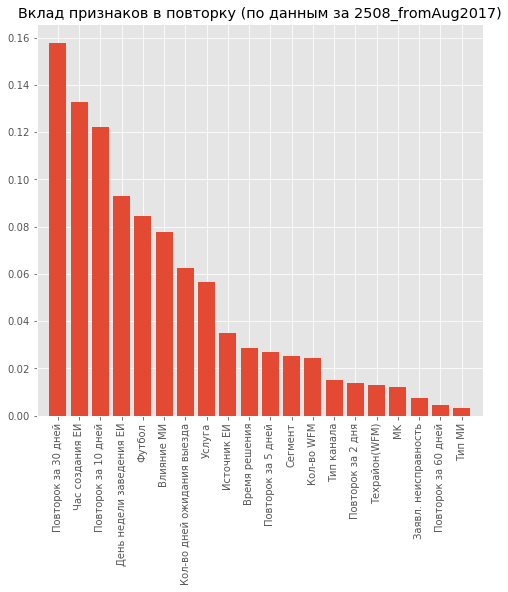

In [63]:
# %%time

data_period = url_to_data.split('.')[0].split('/')[1][4:]

plt.subplots_adjust(left=0.15)
d_first = 20
plt.figure(figsize=(8, 8)).autofmt_xdate() 
plt.title("Вклад признаков в повторку (по данным за {0})".format(data_period))
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_arr_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first])
plt.savefig("FeaturesImportances{0}.pdf".format(data_period))

In [64]:
%%time
print(len(feature_names))
best_features = indices[:8]
best_features_names = feature_names[best_features]
print(best_features_names)

21
Index(['num_of_repeat60', 'decision_time', 'num_of_repeat30', 'EIHourCreate',
       'DECLARED_FAULT', 'TECHNICAL_DISTRICT', 'EIDayOfWeek', 'Channeltype'],
      dtype='object')
Wall time: 1 ms


In [ ]:
%%time
gbt = ensemble.GradientBoostingClassifier(n_estimators=1000, random_state=11)
gbt.fit(X_train[best_features_names], y_train)

err_train = np.mean(y_train != gbt.predict(X_train[best_features_names]))
err_test = np.mean(y_test != gbt.predict(X_test[best_features_names]))
print(err_train, err_test)

In [ ]:
%%time
gbt = ensemble.GradientBoostingClassifier(n_estimators=1000, random_state=11)
gbt.fit(X_train[best_features_names], y_train)

err_train = np.mean(y_train != gbt.predict(X_train[best_features_names]))
err_test = np.mean(y_test != gbt.predict(X_test[best_features_names]))
print(err_train, err_test)